In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = np.random.randint(10, 100, size=20).reshape((-1, 2))
raw_data_X / 10

array([[5.9, 3. ],
       [7.4, 2.1],
       [9.5, 8.6],
       [7.1, 1.1],
       [3.5, 3.7],
       [6.7, 1.2],
       [1.2, 6.8],
       [7.2, 9.4],
       [4. , 6.4],
       [5.2, 2.6]])

In [3]:
np.random.randint?

In [4]:
raw_data_X = [[6.3, 6. ],
       [5.3, 1.5],
       [1.8, 4.1],
       [7.4, 5. ],
       [7.9, 1.5],
       [9.2, 4.4],
       [4.7, 3.4],
       [9.5, 3. ],
       [2.3, 8.7],
       [6.7, 2.5]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [5]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [6]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
X_train

array([[6.3, 6. ],
       [5.3, 1.5],
       [1.8, 4.1],
       [7.4, 5. ],
       [7.9, 1.5],
       [9.2, 4.4],
       [4.7, 3.4],
       [9.5, 3. ],
       [2.3, 8.7],
       [6.7, 2.5]])

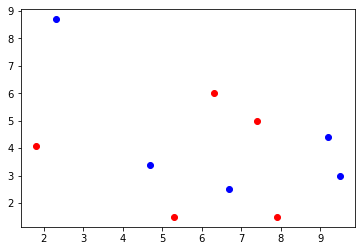

In [8]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue')
plt.show()

In [9]:
x = np.array([8.009, 2.234])

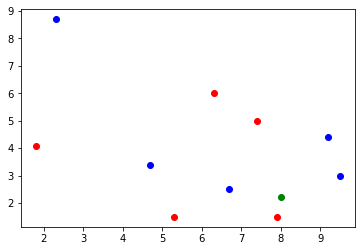

In [10]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue')
plt.scatter(x[0], x[1], color='green')
plt.show()

### knn过程

In [11]:
from math import sqrt
distances = []  # 未知点与每个样本点的距离
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)

In [12]:
distances

[4.135630181725634,
 2.8066772169239558,
 6.483335329905434,
 2.8322494593520537,
 0.742049189744184,
 2.4718489031492195,
 3.5084237201341573,
 1.6762568418950596,
 8.625649946525769,
 1.335753345494594]

In [13]:
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
distances

[4.135630181725634,
 2.8066772169239558,
 6.483335329905434,
 2.8322494593520537,
 0.742049189744184,
 2.4718489031492195,
 3.5084237201341573,
 1.6762568418950596,
 8.625649946525769,
 1.335753345494594]

In [14]:
np.argsort(distances)   # 最近点在训练集中的位置索引值

array([4, 9, 7, 5, 1, 3, 6, 0, 2, 8])

In [15]:
nearest = np.argsort(distances)   # 最近点在训练集中的位置索引值

In [16]:
k = 6

In [18]:
topk_y = [y_train[i] for i in nearest[:k]]

In [19]:
topk_y

[0, 1, 1, 1, 0, 0]

In [20]:
from collections import Counter

In [24]:
Counter(topk_y)

Counter({0: 3, 1: 3})

In [22]:
votes = Counter(topk_y)

In [23]:
votes.most_common(1)  # 找票数最多的几个。

[(0, 3)]

In [25]:
votes.most_common(1)[0][0]

0

In [26]:
predict_y = votes.most_common(1)[0][0]

In [28]:
predict_y

0

### Sklearn对knn的封装解读

In [41]:
raw_data_X = [[6.3, 6. ],
       [5.3, 1.5],
       [1.8, 4.1],
       [7.4, 5. ],
       [7.9, 1.5],
       [9.2, 4.4],
       [4.7, 3.4],
       [9.5, 3. ],
       [2.3, 8.7],
       [6.7, 2.5]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.009, 2.234])
x.shape[0]
X_train.shape[1]

2

In [43]:
%run /home/lin/jupyter/learn_py/KNN.py

In [44]:
predict_y = knn_classify(3, X_train, y_train, x)

In [45]:
predict_y

1

### 使用scikit-learn中的kNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [48]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [53]:
x_predict = x.reshape(1, -1)
kNN_classifier.predict(x_predict)

array([0])

In [54]:
y_predict = kNN_classifier.predict(x_predict)[0]

In [55]:
y_predict

0

### 重新整理手写的knn代码

In [70]:
%run /home/lin/jupyter/learn_py/KNN.py

In [71]:
knn_clf = KNNClassifier(k=6)

In [72]:
knn_clf.fit(X_train, y_train)

KNN(k=6)

In [73]:
y_predict = knn_clf.predict(x_predict)

In [74]:
y_predict

array([0])

### 测试手写的knn代码

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

### train_test_split

In [101]:
y

array([[2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],

In [104]:
# shuffle
shuffle_indexes = np.random.permutation(len(X))

In [105]:
shuffle_indexes

array([ 67, 119,  58,  60, 138, 105,  95,  88, 143, 135,  16,  78, 112,
        79, 145,  50,   9,   1, 133,  47,  98,  36,  94,  96, 100, 144,
        85,  21, 103, 139, 121,  59, 107, 128,  34, 127,   7,  29,  11,
        14, 137,  62,  99,  28,  64,  42, 146, 101, 147,   2,  68,  52,
        19,  84,   8, 142, 131, 106, 125,  30, 120, 111,  41, 148,  69,
        82,  71, 104,  24,  54,   5,   6,  13, 113,  77,  22,  92,  31,
        32,  73,  93,   4,  25, 102,  39, 108,  56,  91,  44,  26,  72,
        86,  80,  90,  18, 140,  23,  65,  27, 124, 123, 117,  37,  63,
       109, 118,  38,  74,   3,  53,  17, 116,  61,  45,  46,  49,  89,
       115, 149, 126,  12,  83, 134, 130, 122,  20, 114,  35,  40,  48,
        97,  33,   0,  10,  43,  15,  70,  55, 141,  57, 110,  51,  75,
        87,  76,  66, 136, 129, 132,  81])

In [108]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [109]:
test_size

30

In [110]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [111]:
X_train = X[train_indexes]
y_train = y[train_indexes]
X_test = X[test_indexes]
y_test = y[test_indexes]

In [137]:
X_train.shape

(105, 4)

In [138]:
y_train.shape

(45, 4)

In [86]:
# shuffle
# tip2: 可以先合并再shuffle再拆分
shuffle_data = np.hstack([X, y.reshape(150, -1)])
shuffle_data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [88]:
shuffle_data2 = np.concatenate([X, y.reshape(-1, 1)], axis=1)
shuffle_data2

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [92]:
np.random.shuffle(shuffle_data)

In [99]:
shuffle_data

array([[7.1, 3. , 5.9, 2.1, 2. ],
       [6.7, 3. , 5. , 1.7, 1. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [7.6, 3. , 6.6, 2.1, 2. ],
       [4.9, 3.6, 1.4, 0.1, 0. ],
       [6.7, 3. , 5.2, 2.3, 2. ],
       [6.7, 3.1, 4.4, 1.4, 1. ],
       [6.7, 3.3, 5.7, 2.5, 2. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [6.4, 2.8, 5.6, 2.1, 2. ],
       [6. , 2.2, 5. , 1.5, 2. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [5.8, 2.8, 5.1, 2.4, 2. ],
       [6.6, 2.9, 4.6, 1.3, 1. ],
       [6. , 3. , 4.8, 1.8, 2. ],
       [6.2, 2.8, 4.8, 1.8, 2. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [6.2, 2.2, 4.5, 1.5, 1. ],
       [4.5, 2.3, 1.3, 0.3, 0. ],
       [5.7, 2.8, 4.1, 1.3, 1. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5. , 2.3, 3.3, 1. , 1. ],
       [6.4, 2.9, 4.3, 1.3, 1. ],
       [6.5, 3. , 5.8, 2.2, 2. ],
       [5.2, 2.7, 3.9, 1.4, 1. ],
       [7.7, 3. , 6.1, 2.3, 2. ],
       [5.1, 2.5, 3. , 1.1, 1. ],
       [6.7, 3.1, 5.6, 2.4, 2. ],
       [4.9, 2

In [97]:
shuffle_X, shuffle_y = np.hsplit(shuffle_data, [-1])

In [98]:
shuffle_X

array([[7.1, 3. , 5.9, 2.1],
       [6.7, 3. , 5. , 1.7],
       [5. , 3. , 1.6, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.7, 3.3, 5.7, 2.5],
       [4.9, 3. , 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [6. , 2.2, 5. , 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.6, 2.9, 4.6, 1.3],
       [6. , 3. , 4.8, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [4.5, 2.3, 1.3, 0.3],
       [5.7, 2.8, 4.1, 1.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.9, 4.3, 1.3],
       [6.5, 3. , 5.8, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.1, 2.5, 3. , 1.1],
       [6.7, 3.1, 5.6, 2.4],
       [4.9, 2.4, 3.3, 1. ],
       [7.7, 3.8, 6.7, 2.2],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [6.1, 2.8, 4. , 1.3],
       [5.4, 3

In [100]:
shuffle_y

array([[2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],

### 使用py

In [7]:
X.shape

(150, 4)

In [8]:
y.shape

(150,)

In [9]:
from learn_py.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2, seed=666)

In [19]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [20]:
from learn_py.kNN import KNNClassifier

In [21]:
myknn_clf = KNNClassifier(k=3)

In [22]:
myknn_clf.fit(X_train, y_train)

KNN(k=3)

In [23]:
y_predict = myknn_clf.predict(X_test)

In [24]:
y_predict

array([2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1,
       0, 0, 1, 2, 1, 2, 0, 2])

In [25]:
sum(y_predict == y_test)

30

In [26]:
accuracy = sum(y_predict == y_test) / len(y_test)

In [27]:
accuracy

1.0

### sklearn中的train_test_split

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [32]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
